## Data Set MNIST | Frame work :Keras(TensorFlow)

### Setup and Load

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout, Input
from keras.datasets import mnist

In [36]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### EDA  and Preprocessing

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

<Axes: ylabel='count'>

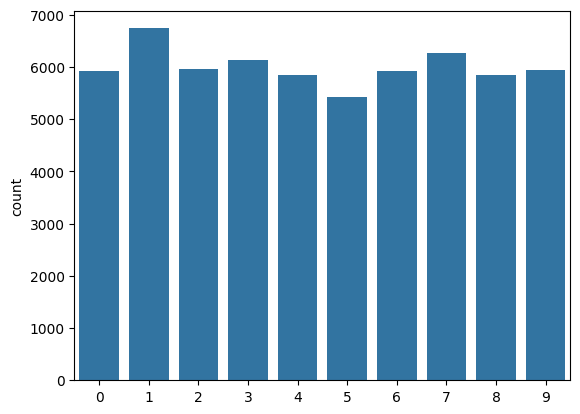

In [39]:
sns.countplot(x=y_train)

In [40]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

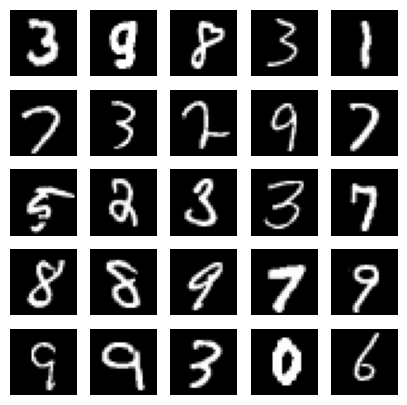

In [41]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray'); plt.axis('off')

In [42]:
 # Vanialla neural network do not take squares so we convert image in a row
image_size= x_train.shape[1]
input_size= image_size * image_size
input_size

784

In [43]:
# so we convert every image into 784 , also compare before after
print(f"before : {x_train.shape}")

x_train = np.reshape(x_train, [-1, input_size])
x_test = np.reshape(x_test, [-1, input_size])

print(f"after : {x_train.shape}")

before : (60000, 28, 28)
after : (60000, 784)


In [44]:
# we normalize the data to make it in one scale
x_train= x_train.astype('float32')/255
y_test= y_test.astype('float32')/255

## Train MLP on MNIST 

### Model is a 3 layer MLP with ReLU activation Function

In [45]:
Model = Sequential()
Model.add(Input(shape=(input_size,)))
Model.add(Dense(256, activation='relu'))
Model.add(Dense(256, activation='relu'))
Model.add(Dense(10, activation='softmax'))

Model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
Model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [47]:
Model.fit(x_train,y_train, epochs=20,batch_size=128,validation_split=0.2,verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9180 - loss: 0.2942 - val_accuracy: 0.9564 - val_loss: 0.1492
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9667 - loss: 0.1116 - val_accuracy: 0.9672 - val_loss: 0.1139
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.0718 - val_accuracy: 0.9739 - val_loss: 0.0900
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0501 - val_accuracy: 0.9747 - val_loss: 0.0901
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9763 - val_loss: 0.0843
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9772 - val_loss: 0.0838
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.9788 - val_loss: 0.0850
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.

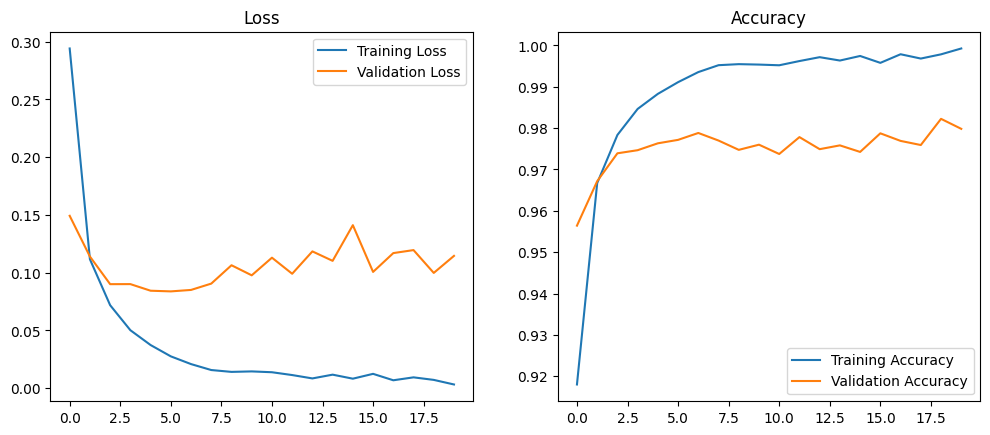

In [49]:
# View Learning history in terms of Loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)

ax1.plot(Model.history.history['loss'], label='Training Loss');
ax1.plot(Model.history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()

ax2.plot(Model.history.history['accuracy'], label='Training Accuracy');
ax2.plot(Model.history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()


### Evaluatation Model performance

In [ ]:
loss1, acc1 = Model.evaluate(x_test, y_test)

print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

## Model Optimization

### Regularization

In [ ]:
Model2 = Sequential()
Model2.add(Input(shape=(input_size,)))
Model2.add(Dense(256, activation='relu'))
Model2.add(Dropout(0.2))

Model2.add(Dense(256, activation='relu'))
Model2.add(Dropout(0.2))

Model2.add(Dense(10, activation='softmax'))

Model.summary()

In [ ]:
Model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
Model2.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2,verbose=1)

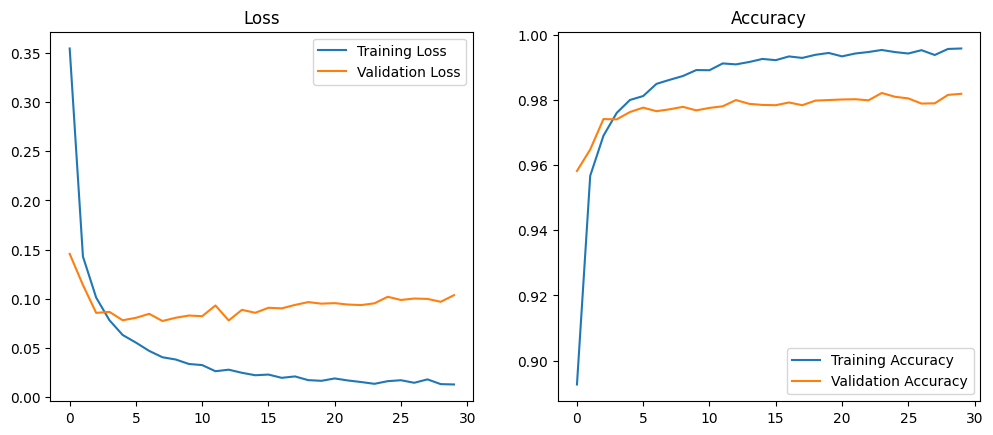

In [50]:
# View Learning history in terms of Loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2); fig.set_figwidth(12)

ax1.plot(Model2.history.history['loss'], label='Training Loss');
ax1.plot(Model2.history.history['val_loss'], label='Validation Loss')
ax1.set_title('Loss'); ax1.legend()

ax2.plot(Model2.history.history['accuracy'], label='Training Accuracy');
ax2.plot(Model2.history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Accuracy'); ax2.legend()


In [51]:
loss2, acc2 , = Model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0974 - loss: 8276.8945 


In [52]:
print(f'accuracy : {acc2*100:.2f}%')
print(f'loss: {loss2*100:.2f}%')

accuracy : 9.74%
loss: 827689.45%
